**<center><h1>Car Damage Detection</h1></center>**

## **Introduction**

In this notebook, we are going to train a detection model in order to detect the car damage

In [1]:
# Install libraries
!pip install seedir
!pip install emoji
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 3.8 MB/s eta 0:00:00


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seedir as sd
from zipfile import ZipFile
import plotly.express as px
import shutil
import cv2
from PIL import Image, ImageDraw
import json
import itertools

In [3]:
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [4]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
#shutil.rmtree("/content/runs")

In [6]:
# create a local directory for the dataset
#shutil.rmtree("/content/car_damage_dataset")
#os.mkdir("/content/car_damage_dataset")
#os.mkdir("/content/car_damage_dataset/YoloV5_format")
#os.mkdir("/content/car_damage_dataset/YoloV8_format")
#os.mkdir("/content/car_damage_dataset/YoloV8_format/severe_damage")
#os.mkdir("/content/car_damage_dataset/YoloV8_format/severe_damage_augmented")

In [7]:
"""def extract_csv(filename, directory_name):
  with ZipFile(filename, 'r') as zipObj:
    # Extract all the contents of zip file in different directory
    zipObj.extractall(directory_name)"""

"def extract_csv(filename, directory_name):\n  with ZipFile(filename, 'r') as zipObj:\n    # Extract all the contents of zip file in different directory\n    zipObj.extractall(directory_name)"

In [8]:
# extract stanford cars dataset into a local directory
#extract_csv("/content/drive/MyDrive/GT-AI: Datasets+Notebooks/Datasets/Cars/Computer Vision/Car_damage/Cars_damage_YoloV5_format.zip", "/content/car_damage_dataset/YoloV5_format")
#extract_csv("/content/drive/MyDrive/GT-AI: Datasets+Notebooks/Datasets/Cars/Computer Vision/Car_damage/car_damage_instance_segmentation.zip", "/content/car_damage_dataset/YoloV8_format")
#*extract_csv("/content/drive/MyDrive/GT-AI: Datasets+Notebooks/Datasets/Cars/Computer Vision/Car_damage/Damage Severity.v1i.yolov8.zip", "/content/car_damage_dataset/YoloV8_format/severe_damage")

In [9]:
#extract_csv("/content/drive/MyDrive/GT-AI: Datasets+Notebooks/Datasets/Cars/Computer Vision/Car_damage/car_damage_severity.v3i.yolov8.zip", "/content/car_damage_dataset/YoloV8_format/severe_damage_augmented")

In [10]:
sd.seedir('/kaggle/input/car-damage-severity-base', itemlimit=5)

car-damage-severity-base/
├─data_o.yaml
└─Damage Severity_yolov8_base/
  ├─README.dataset.txt
  ├─README.roboflow.txt
  ├─data.yaml
  ├─valid/
  │ ├─labels/
  │ │ ├─crashed453_jpg.rf.c3ec0cdddd5538f50c1328dacb153169.txt
  │ │ ├─dent1175_jpg.rf.6d9108cdc5222055f2e40c51ae244ff6.txt
  │ │ ├─27_jpg.rf.888363feca65bfda04a784abb143bd8a.txt
  │ │ ├─glass807_jpg.rf.522979327c8c7aec27f577a89a07e787.txt
  │ │ └─13_jpg.rf.09ac88158ebb8ba8bd126a88edc6abbf.txt
  │ └─images/
  │   ├─glass689_jpg.rf.1510a921bd54928df4176facd250b104.jpg
  │   ├─Img268_jpg.rf.9ed8f7043f54981965e16334c204e3aa.jpg
  │   ├─dent1306_jpg.rf.39841d22ca81cd594a8b1f0271f277be.jpg
  │   ├─Img177_jpg.rf.004b6236f9814885255a75e3501ebfc5.jpg
  │   └─akhand_b43_308_jpg.rf.e8c7e4ff1aacdff737f44c603d40489e.jpg
  └─test/
    ├─labels/
    │ ├─crashed423_jpg.rf.a2a93b63689da9482c860548535afad1.txt
    │ ├─glass535_jpg.rf.2d4492389f0fada66a6d7ec7cb2dcc6f.txt
    │ ├─0165_JPEG_jpg.rf.2b928623dc2f684f2180abbed052c74f.txt
    │ ├─scratch19

In [11]:
! pwd

/kaggle/working


## **Modeling**

let's start by training yolov8

In [12]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [13]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4637.7/8062.4 GB disk)


In [14]:
from ultralytics import YOLO

from IPython.display import display, Image

In [15]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/kaggle/input/car-damage-severity-base/data_o.yaml epochs=100 imgsz=640

/kaggle/working
100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 154MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/kaggle/input/car-damage-severity-base/data_o.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [16]:
!ls {HOME}/runs/segment/train/

BoxF1_curve.png       events.out.tfevents.1683302378.e18f2f7a05af.107.0
BoxPR_curve.png       results.csv
BoxP_curve.png	      val_batch0_labels.jpg
BoxR_curve.png	      val_batch0_pred.jpg
MaskF1_curve.png      val_batch1_labels.jpg
MaskPR_curve.png      val_batch1_pred.jpg
MaskP_curve.png       val_batch2_labels.jpg
MaskR_curve.png       val_batch2_pred.jpg
args.yaml	      weights
confusion_matrix.png


In [17]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data=/kaggle/input/car-damage-severity-base/data_o.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780761 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /kaggle/input/car-damage-severity-base/Damage Severity_yolov8_base
val: WARNING ⚠️ Cache directory /kaggle/input/car-damage-severity-base/Damage Severity_yolov8_base/valid is not writeable
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        494        837      0.741      0.698      0.706      0.597      0.736      0.694      0.699       0.55
                 minor        494        298      0.714      0.557      0.572       0.44        0.7      0.547      0.552      0.391
              mo

In [18]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/kaggle/input/car-damage-severity-base/Damage Severity_yolov8_base/test/images save=true

/kaggle/working
Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/yolo/cfg/__init__.py", line 212, in entrypoint
    raise argument_error(a)
SyntaxError: 'Severity_yolov8_base/test/images' is not a valid YOLO argument.

    YOLOv8 'yolo' CLI commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo detect train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentati

/kaggle/working


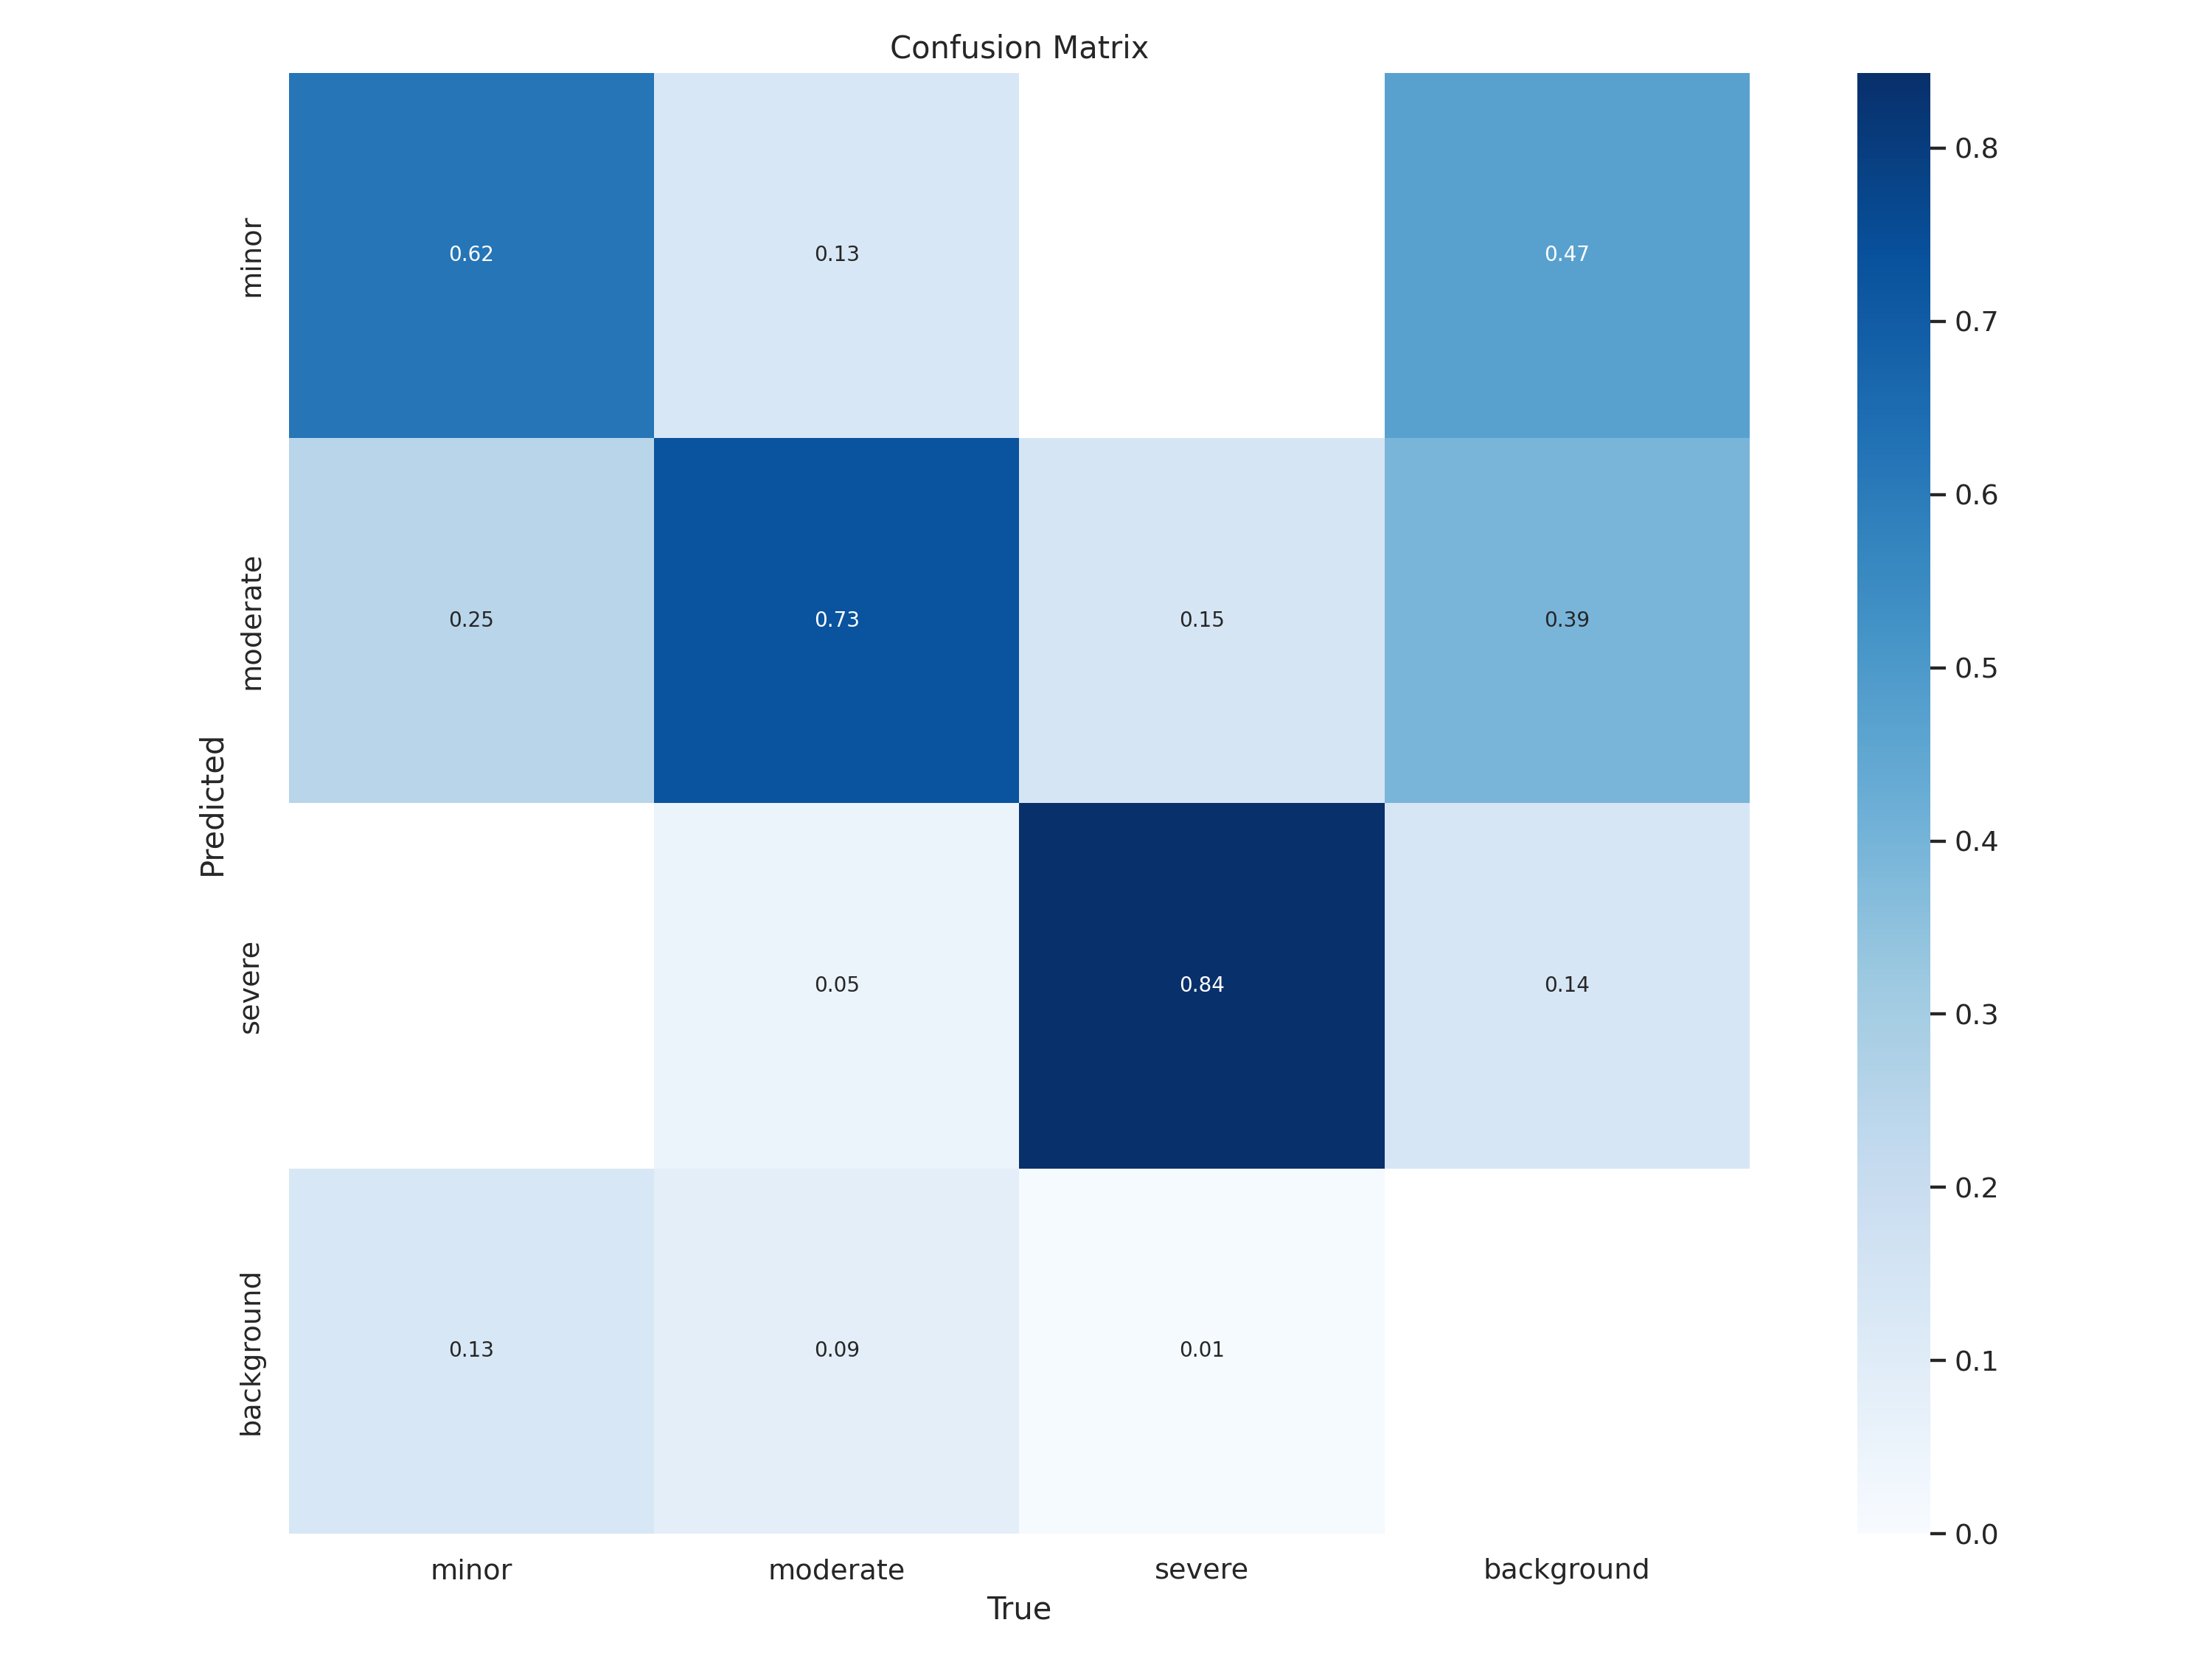

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

In [20]:
"""%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)"""

"%cd {HOME}\nImage(filename=f'{HOME}/runs/segment/train/results.png', width=1000)"

/kaggle/working


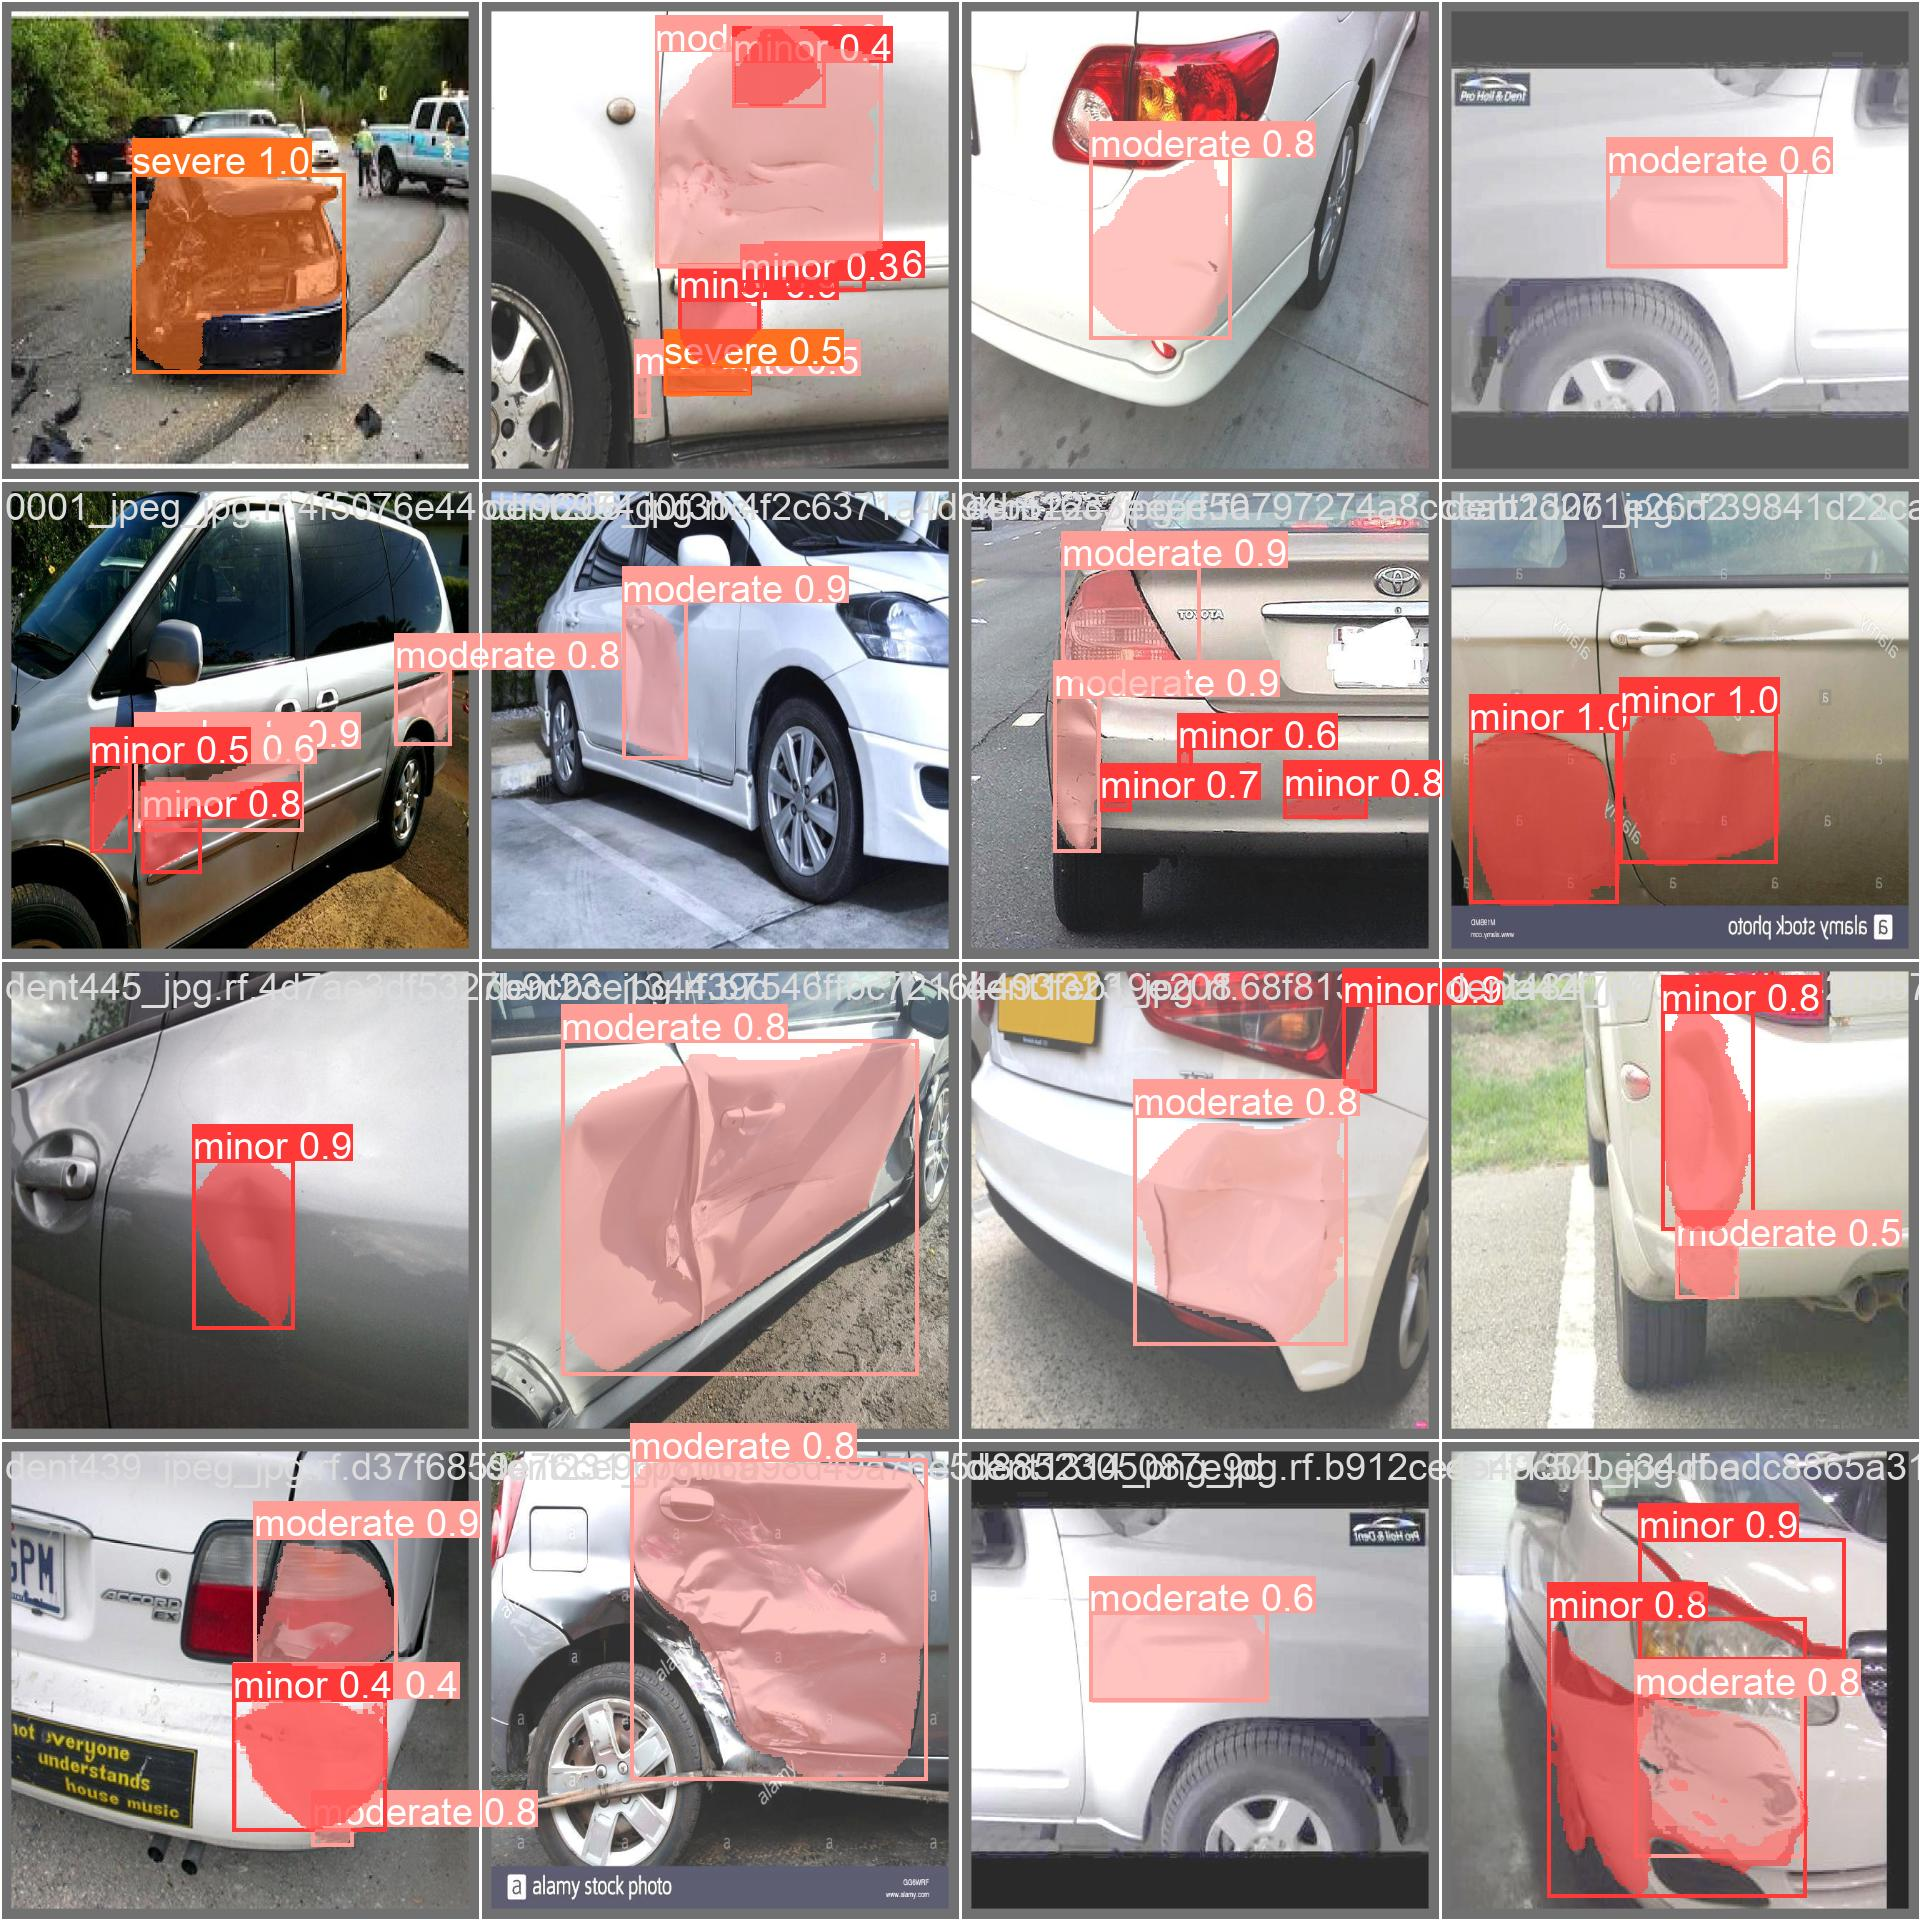

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")